In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
import shap as sh

In [5]:
data = pd.read_csv("/content/ctr_ratio.csv")
print(data.sample(5))

      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
3001                     83.47   34     59785.94                160.03   
8594                     59.05   22     61009.10                136.21   
6092                     40.34   31     28271.84                207.17   
4118                     51.24   36     70592.81                140.46   
6819                     70.03   25     55195.61                245.89   

                                Ad Topic Line           City  Gender  \
3001               Cloned explicit middleware  Patriciahaven  Female   
8594     Digitized contextually-based product      Combsstad  Female   
6092      De-engineered tertiary secured line    New Michael  Female   
4118  Multi-layered fresh-thinking neural-net  North Brandon  Female   
6819        Synergized intangible open system     Lake David    Male   

             Country         Timestamp  Clicked on Ad  
3001    Turkmenistan  11-03-2016 00:05              0  
8594      

In [6]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No",
                               1: "Yes"})

In [7]:
fig = px.box(data,
             x="Daily Time Spent on Site",
             color="Clicked on Ad",
             title="Click Through Rate based Time Spent on Site",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [8]:
fig = px.box(data,
             x="Daily Internet Usage",
             color="Clicked on Ad",
             title="Click Through Rate based on Daily Internet Usage",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [9]:
fig = px.box(data,
             x="Age",
             color="Clicked on Ad",
             title="Click Through Rate based on Age",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [10]:
fig = px.box(data,
             x="Area Income",
             color="Clicked on Ad",
             title="Click Through Rate based on Income",
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [11]:
data["Clicked on Ad"].value_counts()

,count
Clicked on Ad,
No,5083
Yes,4917


In [12]:
click_through_rate = 4917 / 10000 * 100
print(click_through_rate)

49.17


In [13]:
data["Gender"] = data["Gender"].map({"Male": 1,
                               "Female": 0})

x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [17]:
y_pred = model.predict(xtest)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.9585


In [21]:
explainer=sh.TreeExplainer(model)
shap_values=explainer.shap_values(xtest)

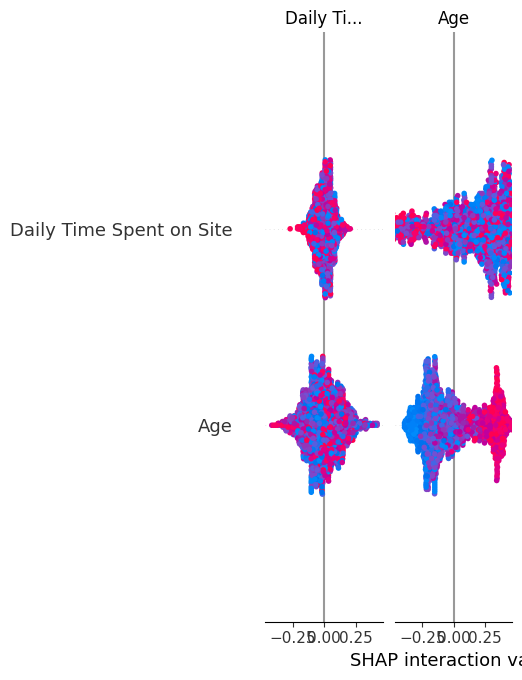

In [22]:
sh.summary_plot(shap_values,xtest)

In [29]:
sh.initjs()
sh.force_plot(explainer.expected_value, shap_values[0],feature_names=data)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).